# Unsupervised Learning

Unsupervised learning are often explained relative to supervised learning. The former contrary to the latter is not trained to predict a target variable. They exploit data to discover inherent patterns and structures. 

### Principal Component Analysis (PCA)

In a datascience project we often find ourself with a lot of features. Although it can strenght a model, some features often might not be relevant or be correlated between each other creating redundancy. PCA is a unsupervised machine learning method that transforms these features to a new set, named **Principal Components** (PC), that are uncorrelated between themself. They are made in such a way that the first PC (PC1) contain most of the variance of the data, the second PC (PC2) contains the next highest amount of variance, and so on. 

This approach helps to simplify the complexity of high-dimensional data, making the analysis more manageable and insightful.

#### Application
PCA is used to simplify the complexity of high-dimensional data for

* Data Visualization
    * To reduce dimensions to 2D or 3D for visualization.
* Feature Extraction and Data Compression
    * In machine learning, PCA is often used to simplify the data, reducing the number of features that need to be processed, and thus improving the efficiency of other algorithms.
* Exploratory Data Analysis
    * PCA can reveal the underlying structure of the data, identify patterns, and detect correlations and outliers.

#### Limitations
* Interpretability
    * The principal components themselves can sometimes be difficult to interpret, as they are combinations of all original features, which complicates understanding the role of original features.

#### Exemple

I will use PCA to transform the original features to uncorrelatted ones. Here is the steps:
1. Preprocess the data
    * Standardize the numerical variables
    * One hot encoder the categorical variable
2. Use PCA to transform the original features
3. Plot the % of variance explained by the PCA features
4. Plot the component of the original features in the two firsts PCA features

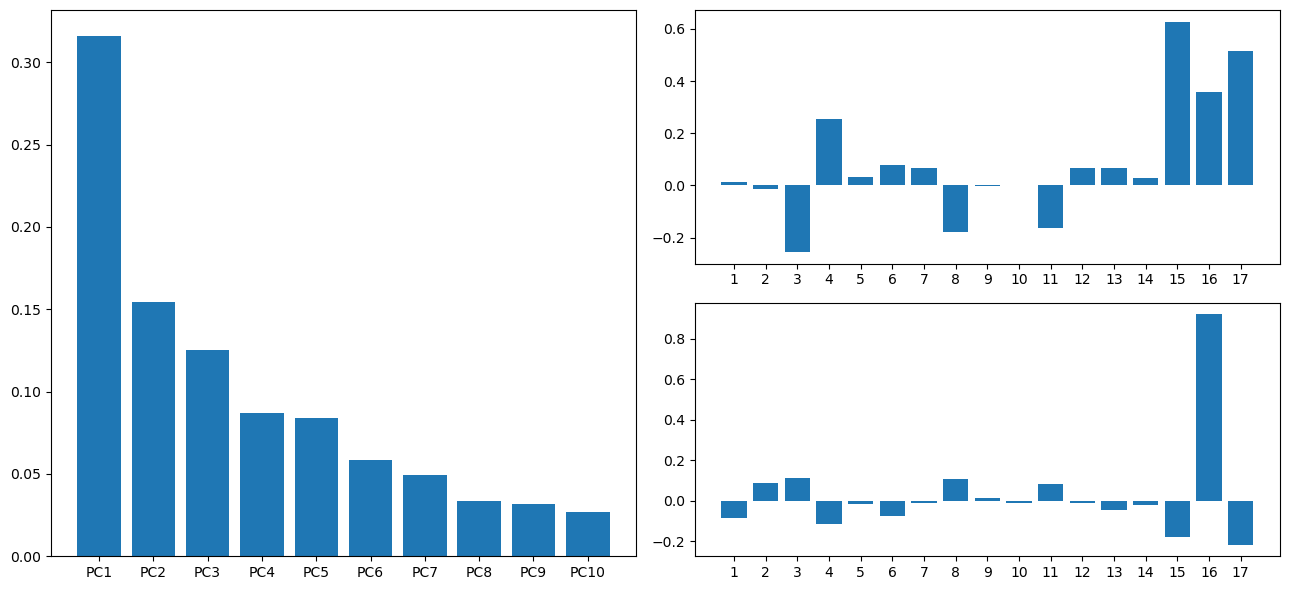

In [101]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt


df = pd.read_csv("cleaned_data.csv")
df = df.drop("id", axis=1).copy()

#1. Preprocess the data
categories = df.select_dtypes(include="object").columns.to_list()
numerical = df.select_dtypes(include="float64").columns.to_list()

preprocessing = ColumnTransformer(transformers=[
    ("cat",OneHotEncoder(),categories),
    ("num", StandardScaler(), numerical)
])

X = df.drop("stroke",axis=1)
X_transformed = preprocessing.fit_transform(X)

#2. Use PCA to transform the original features
PCA = PCA().fit(X_transformed)
pca_var = PCA.explained_variance_ratio_[:10]
eigenvectors = PCA.components_

#3. Plot the % of variance explained by the PCA features
fig = plt.figure(figsize=(13, 6))
grid_size = (2, 2)
ax1 = plt.subplot2grid(grid_size, (0, 0), rowspan=2)
ax2 = plt.subplot2grid(grid_size, (0, 1))
ax3 = plt.subplot2grid(grid_size, (1, 1))

#4. Plot the component of the original features in the two firsts PCA features
ax1.bar(['PC'+str(i) for i in range(1,len(pca_var)+1)],pca_var)
ax2.bar([str(i) for i in range(1,len(eigenvectors)+1)],eigenvectors[0])
ax3.bar([str(i) for i in range(1,len(eigenvectors)+1)],eigenvectors[1])

plt.tight_layout()

X_pca = PCA.transform(X_transformed)



### K means clustering

It is an unsupervised learning algorithm that is used to cluster records into K groups. Here's a swift overview of the algorithm:
1. Initialization
    * Select K random points from the dataset as initial cluster centers or centroids.
2. Assignment
    * Each data point in the dataset is assigned to the nearest centroid, based on Euclidean distance, effectively forming K initial clusters.
3. Update
    * The centroids are recalculated as the mean of all data points assigned to each cluster, refining their positions.
4. Evaluation
    * Calculate the within-cluster sum of squares, which is the total sum of the squared distances between each data point and its corresponding centroid. This metric helps evaluate the compactness of the clusters.
5. Iteration
    * Steps 2, 3, and 4 are repeated until the centroids no longer move significantly or the decrease in the sum of squares between iterations falls below a threshold, indicating that the clusters are as compact and distinct from each other as possible.

#### Application

* Document Clustering
    * Used in document categorization to group similar documents together, aiding information discovery and organization.
#### Limitation

#### Limitation
* Choice of K
    * Methods like the elbow method can help, but the choice of K often lacks a clear guideline and may require domain knowledge.
* Sensitivity to Initialization
    * The results of K-means can significantly vary based on the initial set of centroids. 


#### Example

In the following a short example where I clustered in two groups the dataset:

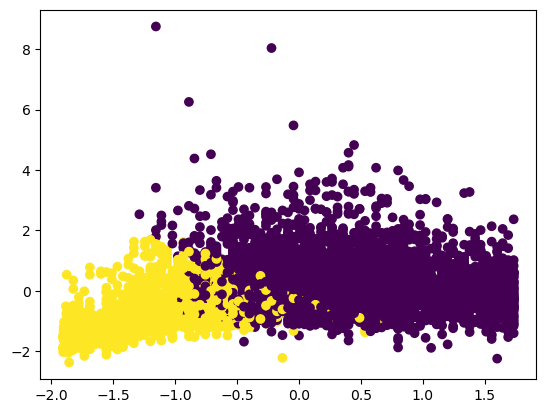

In [86]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,n_init=10)
kmeans.fit(X_transformed)
labels = kmeans.labels_
plt.scatter(X_transformed[:,14],X_transformed[:,16],c=labels)


### Hierarchical clustering


It is a method used to group objects based on their similarity. In agglomerative hierarchical clustering, each data point starts as its own cluster, and pairs of clusters are merged as one moves up the hierarchy. This method builds a tree of clusters called a dendrogram, which shows how each group is combined step-by-step. Common linkage criteria used to determine the similarity between clusters include:

- **Single Linkage**: the shortest distance between points in two clusters.
- **Complete Linkage**: the longest distance between points in two clusters.
- **Average Linkage**: the average distance between points in two clusters.
- **Ward’s Method**: minimizes the total within-cluster variance.

The choice of linkage criterion can significantly affect the structure of the resulting dendrogram and the interpretation of clusters.

#### Application



* **Biological Sciences**
    * It's used for classifying plants or animals into hierarchical taxonomy and analyzing gene expression data to identify functionally related genes.
* **Customer Segmentation**
    * Helps in marketing analysis by identifying distinct groups of customers based on purchasing patterns or behaviors, enhancing targeted marketing.
- **Document Organization**
    * Useful in information retrieval, grouping related documents in libraries or on the web, which helps in improving search results.



#### Limitation

- **Computational Cost**
    * The algorithm is computationally intensive, especially with large datasets. It typically has a quadratic time complexity, making it less scalable compared to other clustering techniques like k-means.
- **Irreversible Steps**
    * Once a merging step has been completed during the agglomerative process, it cannot be undone. This might lead to suboptimal clustering if early decisions in the hierarchy turn out to be incorrect based on later information.


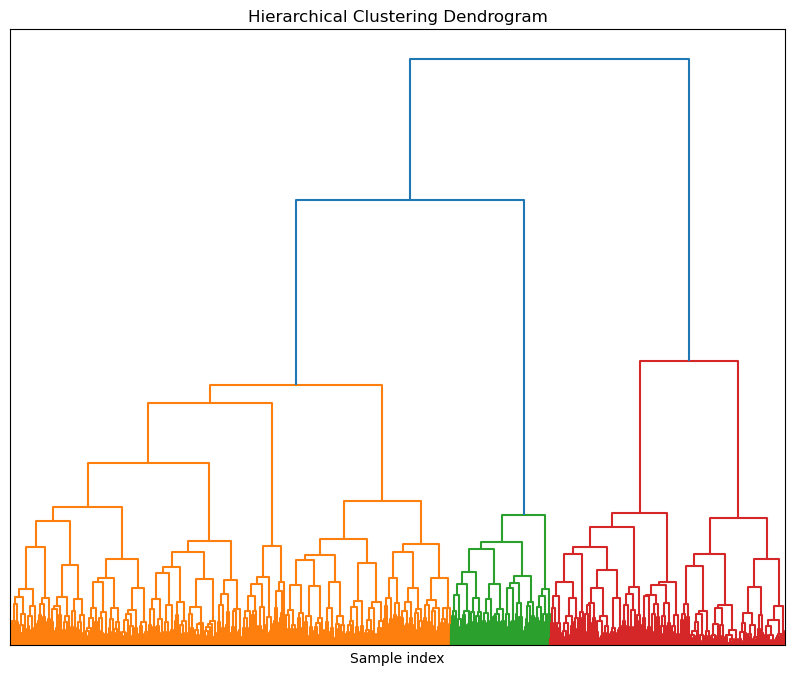

In [100]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X_pca, 'ward')
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the size as needed
dendrogram(Z,
           ax=ax,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
ax.yaxis.set_visible(False)
ax.set_title('Hierarchical Clustering Dendrogram')
ax.set_xlabel('Sample index')
ax.set_ylabel('Distance')
ax.set_xticks([])
plt.show()

### Model-based clustering

This method forms clusters from a dataset by fitting statistical distributions. One of the main distributions used is the multivariate Gaussian distribution, which is an extension of the 1D Gaussian distribution to several dimensions. We can visualize a 2D Gaussian distribution as a hill, where the location of the peak corresponds to the mean $\mu$ (a position vector (x,y)), and the spread of the hill is represented by the covariance matrix (the high-dimensional version of variance). The algorithm optimizes these two parameters (covariance and mean) to best fit the clusters to the data.

Forming clusters based on gaussian distribution allows to extract different populations from a dataset. In other words, mdel-based clustering assumes that the overall dataset is a mixture of several different statistical populations. Each population is modeled as coming from a distinct multivariate normal distribution. This reflects real-world scenarios where data might naturally segment into different groups based on underlying factors.

The advantadges compared to non-model clustering:
* Statistical Precision
    * Each cluster represents a different statistical population with unique parameters like mean, variance, and covariance, reflecting diverse data characteristics.

* Flexible Cluster Geometry 
    * The method can adapt to various cluster shapes and sizes, handling data heterogeneity effectively.

#### Application 

* Bioinformatics
    * Identifies genetic subpopulations, aiding in evolutionary studies.
* Healthcare
    * Facilitates patient stratification based on health indicators for personalized treatment plans.


#### Limitations

* Assumption of Normality
    * The most common implementations assume that data within each cluster follows a normal distribution. 
* Scalability
    * These methods can become computationally intensive as the number of dimensions (features) and the size of the data increase
* Interpretation of Clusters
    * The statistical complexity of the model can sometimes make it difficult to interpret the results.

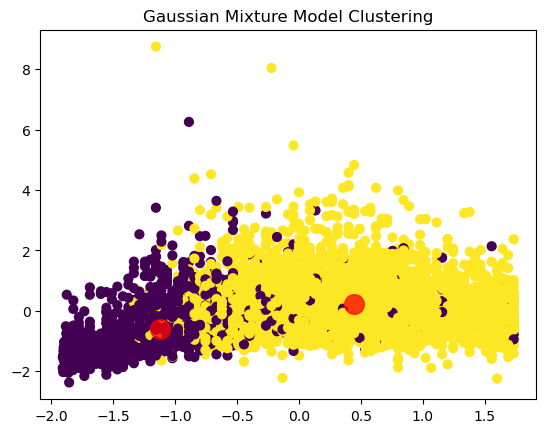

In [99]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=2, random_state=0).fit(X_transformed)
labels = gm.predict(X_transformed)
plt.scatter(X_transformed[:,14], X_transformed[:,16], c=labels, s=40, cmap='viridis')
plt.title('Gaussian Mixture Model Clustering')

centers = gm.means_
plt.scatter(centers[:, 14], centers[:, 16], c='red', s=200, alpha=0.75)
plt.show()